In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Генератор датасета
def devil(n=2, d=2, k=3):

    x = np.zeros((n*k, d))
    y = np.zeros(n*k, dtype="uint8")
    for j in range(k):
        ix = range(j*n, (j+1)*n)
        r = np.linspace(0.0, 1, n)
        t = np.linspace(j*4, (j+1)*4, n) + np.random.randn(n) * 0.2
        x[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return x, y

In [8]:
# Формируем датасет
n = 300
k=3
x, y = devil(n, d=2, k=k)
print(x.shape, y.shape)
x[:, 0] += np.random.normal(loc=0, scale=0.15, size=n*k)
x[:, 1] += np.random.normal(loc=0, scale=0.15, size=n*k)

(900, 2) (900,)


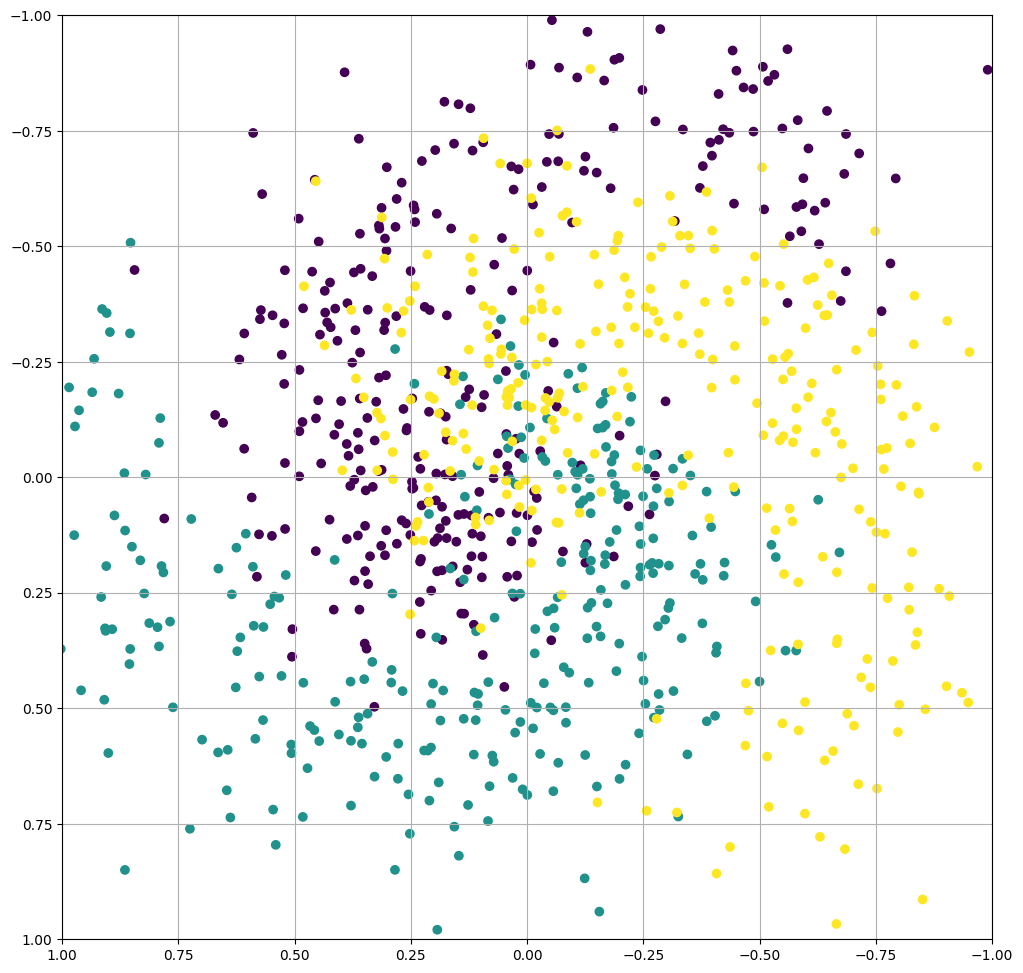

In [9]:
# Вывод датасет в виде графика на экран
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])

x_min, x_max = 1,-1
y_min, y_max = 1,-1

h= 0.05

plt.figure(figsize=(12,12))

plt.scatter(x[:,0], x[:, 1], c=y)
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)
plt.show()

In [10]:
# Разделение датасета на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)
x_train.shape,  y_train.shape, x_test.shape, y_test.shape

((540, 2), (540,), (360, 2), (360,))

In [11]:
# Обучение модели классификации
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)


KNeighborsClassifier()

In [12]:
# Выполняем предкит
from sklearn.metrics import accuracy_score

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

print(f"Accuracy train = {accuracy_score(y_train, predict_train )}")
print(f"Accuracy test = {accuracy_score(y_test, predict_test )}")

Accuracy train = 0.8185185185185185
Accuracy test = 0.7555555555555555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(200, 200) (200, 200) (200, 200)


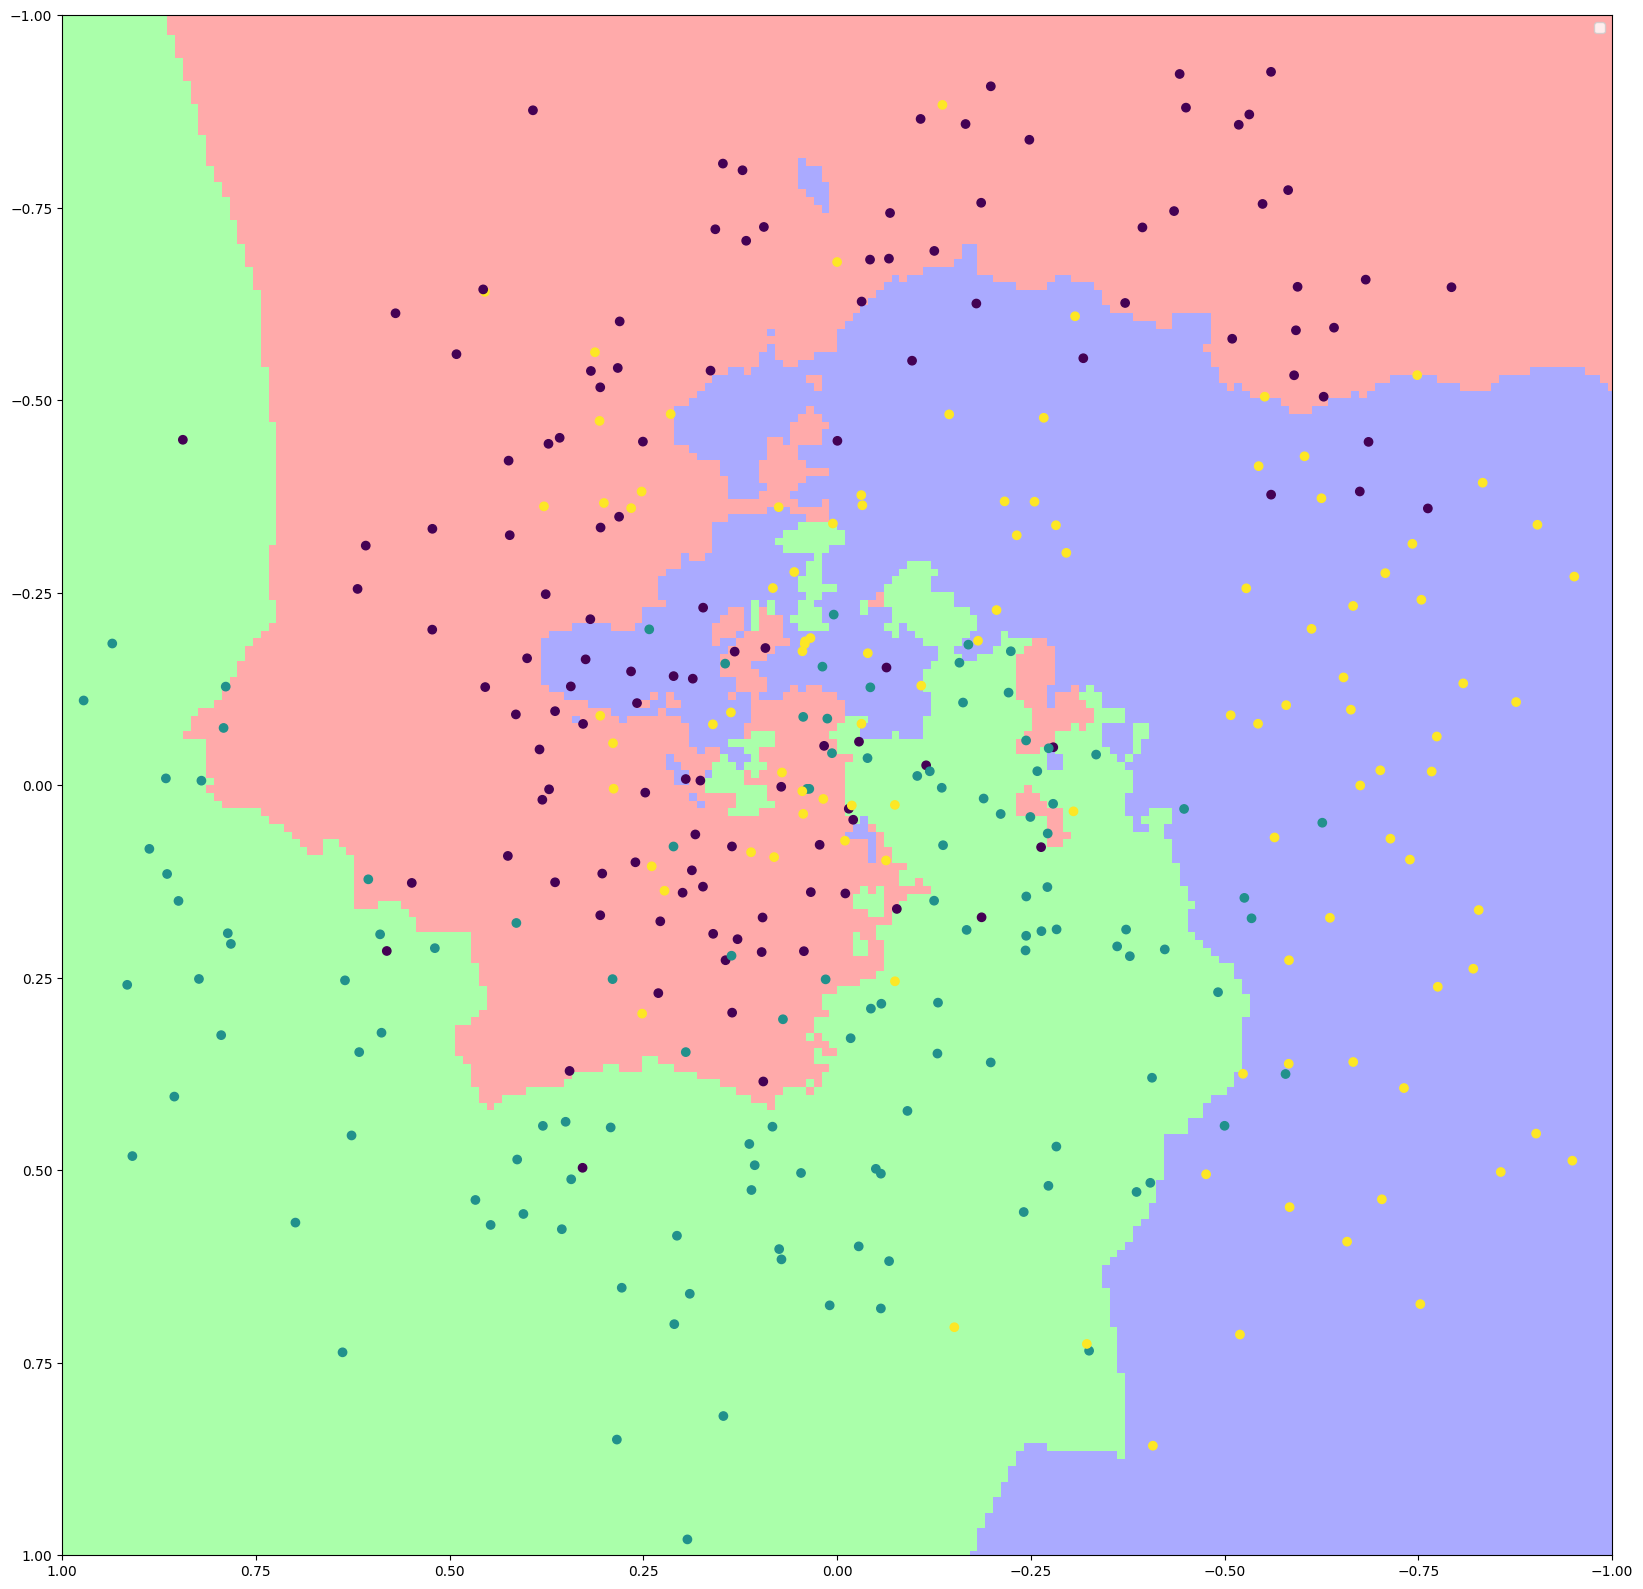

In [21]:
# Визуализация результатов

plt.figure(figsize=(20,20))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

print(xx.shape, yy.shape, z.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.legend()
plt.show()
